Dados los puntos (−1,1),(0,5),(1,3), se ha obtenido los splines cúbicos correspondientes. 
Sin embargo, al observar la figura, usted no se siente satisfecho con la pendiente resultante en el punto (x1,y1).
Y decide intentar una modificación a las ecuaciones, tal que los splines sean tangentes a una pendiente deseada m
en el punto (x1,y1)


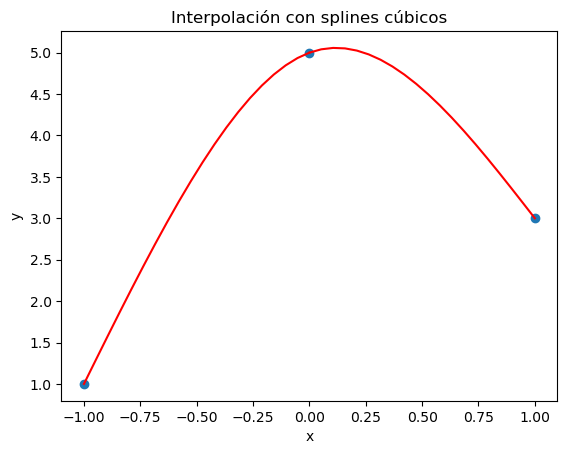

In [6]:
def Spline(x: float, x0: float, pars: dict[str, float]) -> float:
    a = pars["a"]
    b = pars["b"]
    c = pars["c"]
    d = pars["d"]
    return a + b * (x - x0) + c * (x - x0) ** 2 + d * (x - x0) ** 3
import matplotlib.pyplot as plt
import numpy as np

xs = [-1, 0, 1]
ys = [1, 5, 3]
s = [
    {"a": 1, "b": 5.5, "c": 0, "d": -1.5},
    {"a": 5, "b": 1, "c": -4.5, "d": 1.5},
]
for i, x_i in enumerate(xs[:-1]):
    _x = np.linspace(x_i, xs[i + 1], 20)
    _y = Spline(_x, x_i, s[i])
    plt.plot(_x, _y, color="red")

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolación con splines cúbicos")
plt.show()

vamos a modifcarlo

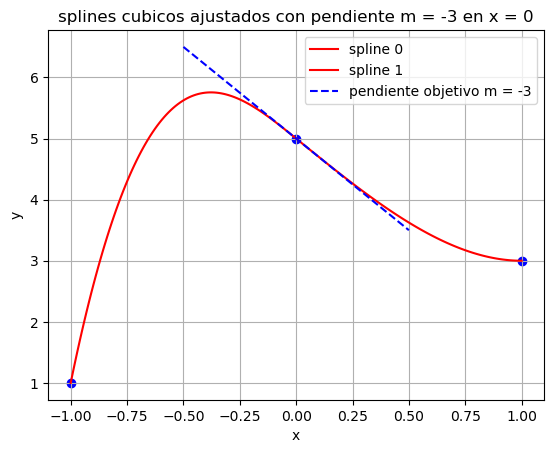

In [7]:
import matplotlib.pyplot as plt
import numpy as np
puntos_x = [-1, 0, 1]
puntos_y = [1, 5, 3]
pendiente_objetivo = -3
parametro_libre = 1
coeficientes_splines = [
    {"a": 1, "b": 19 - parametro_libre, "c": 2 * parametro_libre - 23, "d": 8 - parametro_libre},
    {"a": 5, "b": -3, "c": 1 - parametro_libre, "d": parametro_libre},
]
def spline_cubico(x, x_inicial, coef):
    a = coef["a"]
    b = coef["b"]
    c = coef["c"]
    d = coef["d"]
    return a + b * (x - x_inicial) + c * (x - x_inicial) ** 2 + d * (x - x_inicial) ** 3
for indice, x_inicio in enumerate(puntos_x[:-1]):
    x_vals = np.linspace(x_inicio, puntos_x[indice + 1], 100)
    y_vals = spline_cubico(x_vals, x_inicio, coeficientes_splines[indice])
    plt.plot(x_vals, y_vals, color="red", label=f"spline {indice}")
plt.scatter(puntos_x, puntos_y, color="blue")
x_linea = np.linspace(-0.5, 0.5, 10)
y_linea = pendiente_objetivo * x_linea + puntos_y[1]
plt.plot(x_linea, y_linea, '--', label='pendiente objetivo m = -3', color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.title("splines cubicos ajustados con pendiente m = -3 en x = 0")
plt.legend()
plt.grid(True)
plt.show()